In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

# How to use psexlorer

We need to import PTPS class, which contains most of the tools to work with already constructed pseudosection with `ptbuilder`.

In [2]:
from pypsbuilder import PTPS

We create instance of PTPS by openning existing project file

In [3]:
pt = PTPS('/home/ondro/Active/00-TC350-2020/avgpelite/avgpelite.ptb')

Area defined by unilines 33 34 35 36 37 38 is not valid field.


We can check, whether the pseudosection alredy contains gridded calculations. If not, we can use `calculate_composition` method to calculate compositional variations on grid.

In [4]:
if not pt.gridded:
    pt.calculate_composition(nx=50, ny=50)

Gridding 1/1: 100%|██████████| 2500/2500 [03:10<00:00, 13.12it/s]


Grid search done. 0 empty points left.


## Show pseudosection
To show pseudosection, we can use `show` method

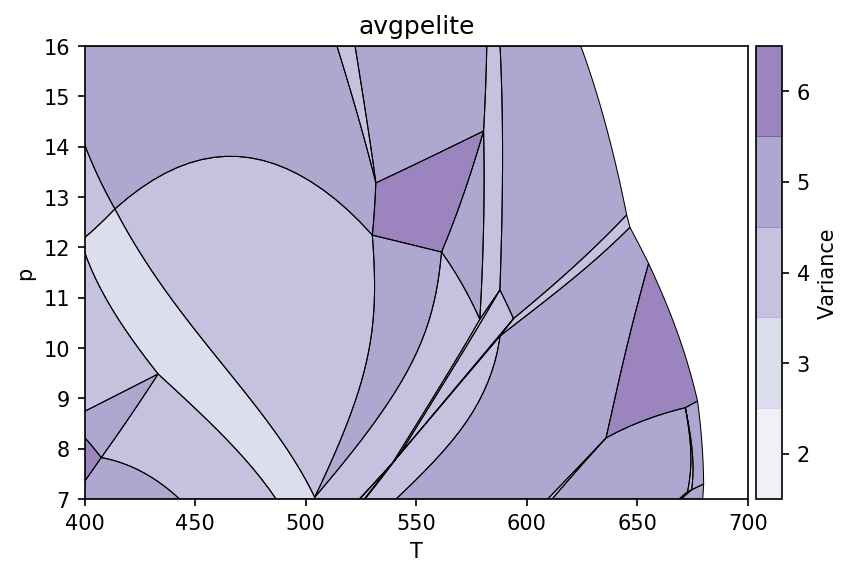

In [5]:
pt.show()

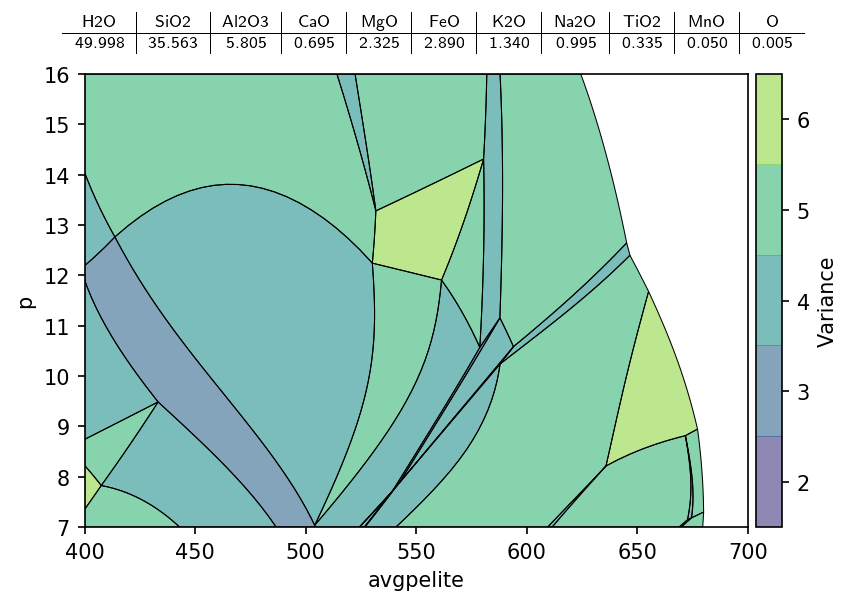

In [6]:
pt.show(cmap='viridis', bulk=True)

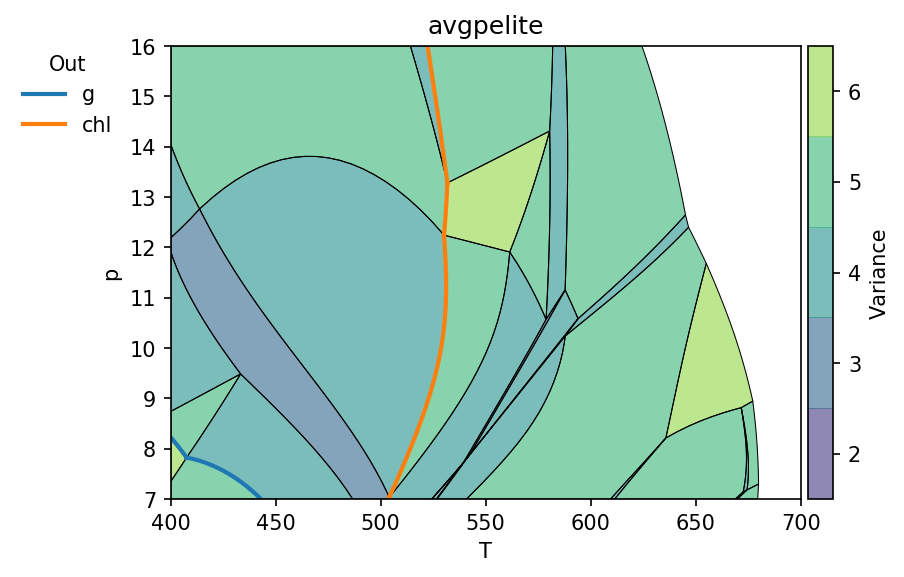

In [7]:
pt.show(cmap='viridis', out=['g', 'chl'])

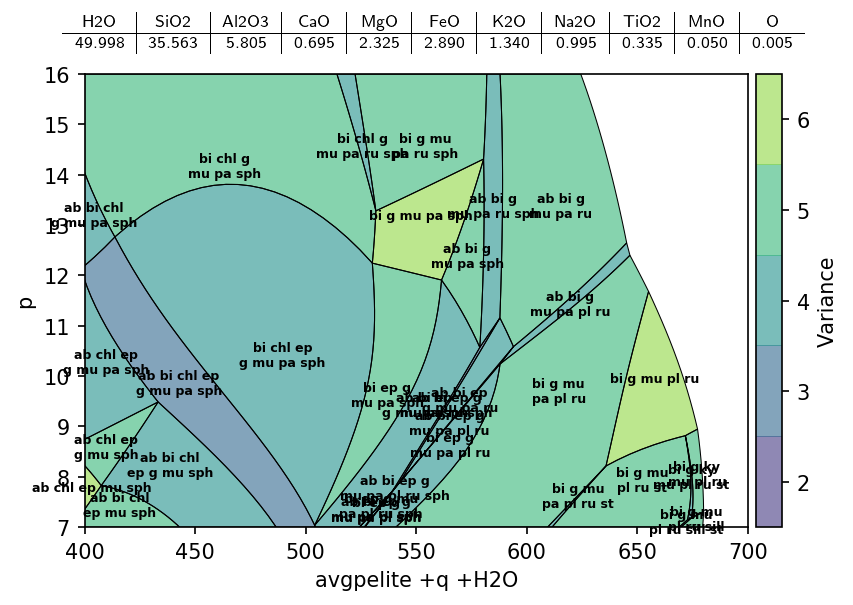

In [8]:
pt.show(cmap='viridis', bulk=True, label=True)

`identify` method could be used to identify stable assemblage for given *p* and *T* conditions.

In [9]:
key = pt.identify(550, 13)
print(key)

frozenset({'pa', 'g', 'bi', 'mu', 'H2O', 'q', 'sph'})


## Access various data sources and variables
Most of methods, which needs expression as argument can list available variables when expression is ommitted.

In [10]:
pt.show_data(key, 'g')

Missing expression argument. Available variables for phase g are:
mode x z m f xMgX xFeX xMnX xCaX xAlY xFe3Y H2O SiO2 Al2O3 CaO MgO FeO K2O Na2O TiO2 MnO O factor G H S V rho


`show_data` method will show available data for given stable assemblage. It is combination of calculations from invariant points, univariant lines and calculations on the grid.

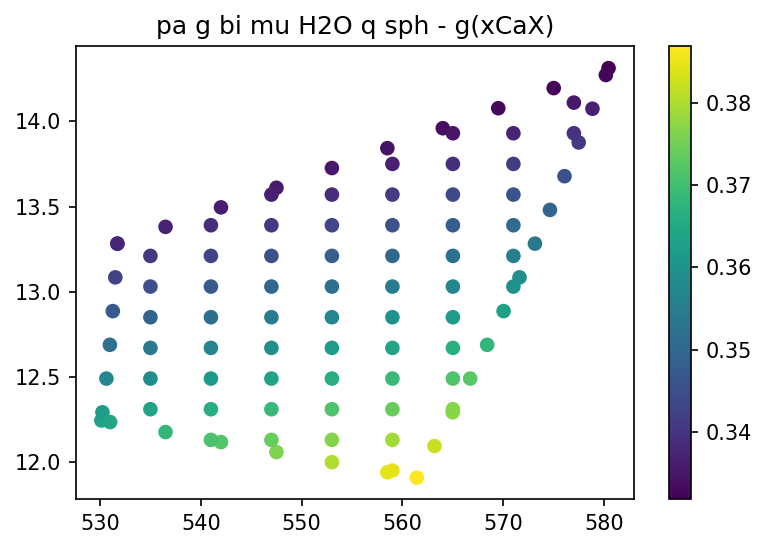

In [11]:
pt.show_data(key, 'g', 'xCaX')

You can access data sources individually

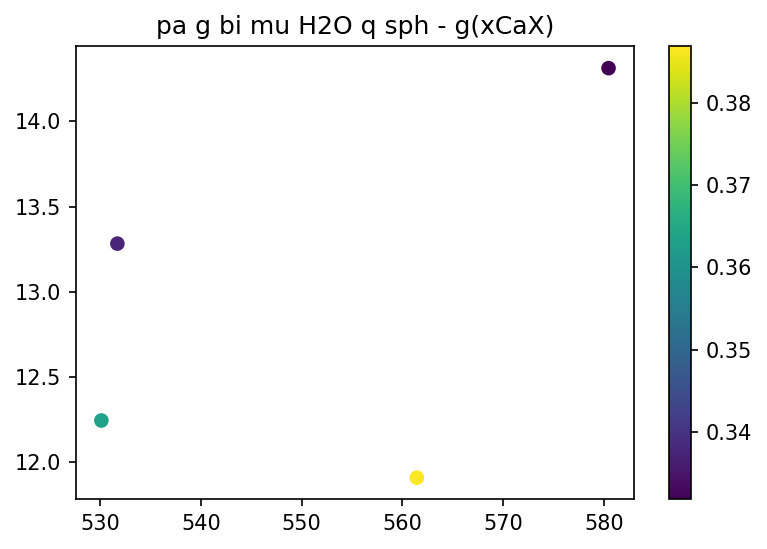

In [12]:
pt.show_data(key, 'g', 'xCaX', which=1)

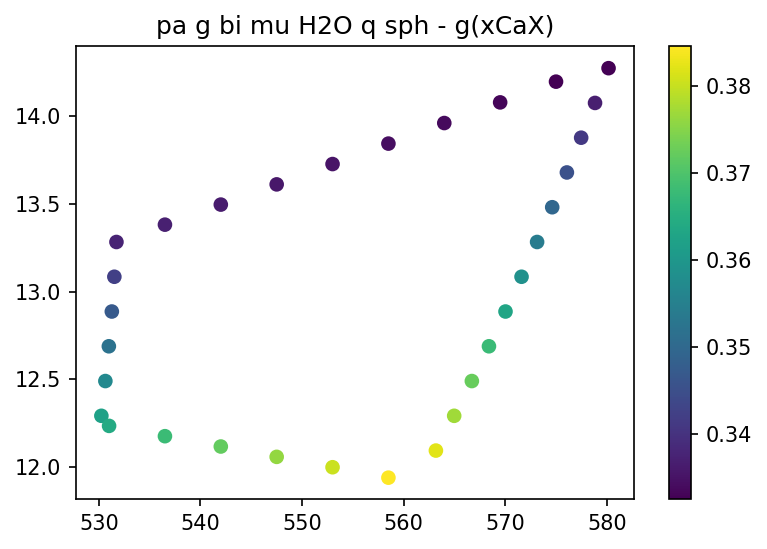

In [13]:
pt.show_data(key, 'g', 'xCaX', which=2)

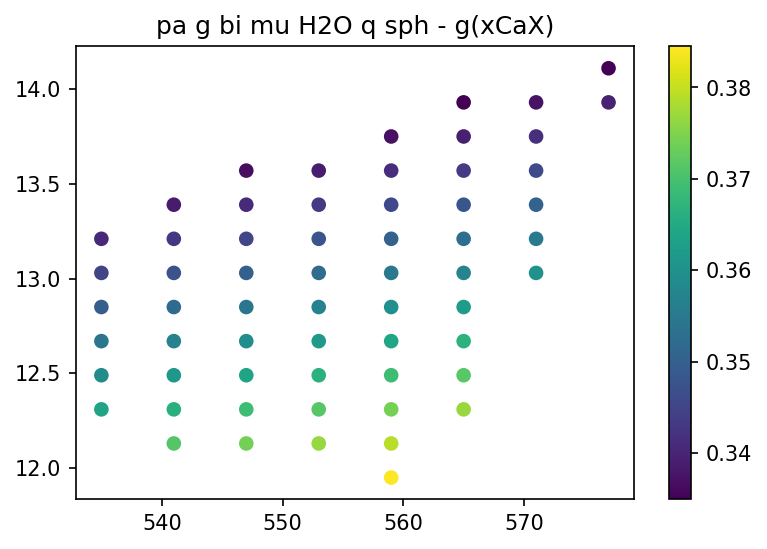

In [14]:
pt.show_data(key, 'g', 'xCaX', which=4)

For data on the grid you can visualize them for all diagram in once

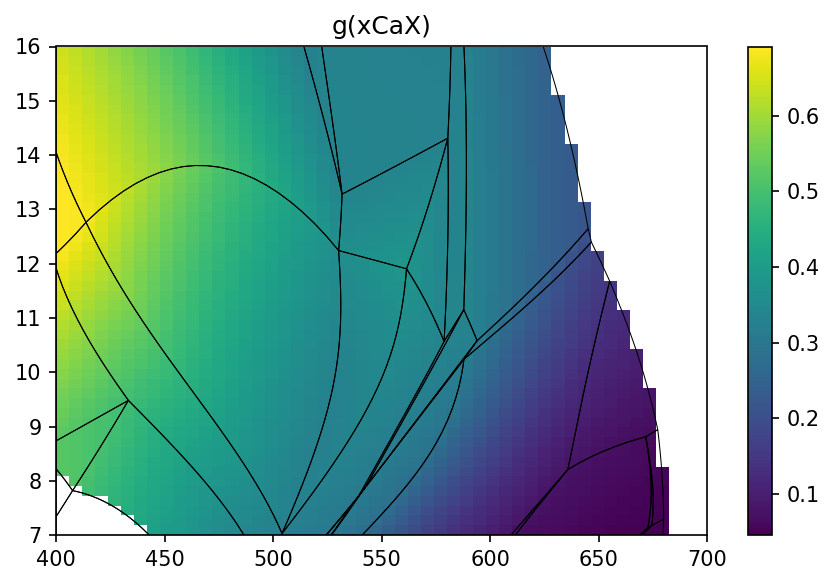

In [15]:
pt.show_grid('g', 'xCaX')

To create isopleths diagram you can use `isopleths` method. Note that contours are created separatelly for each stable assemblage allowing proper geometry of isopleths.

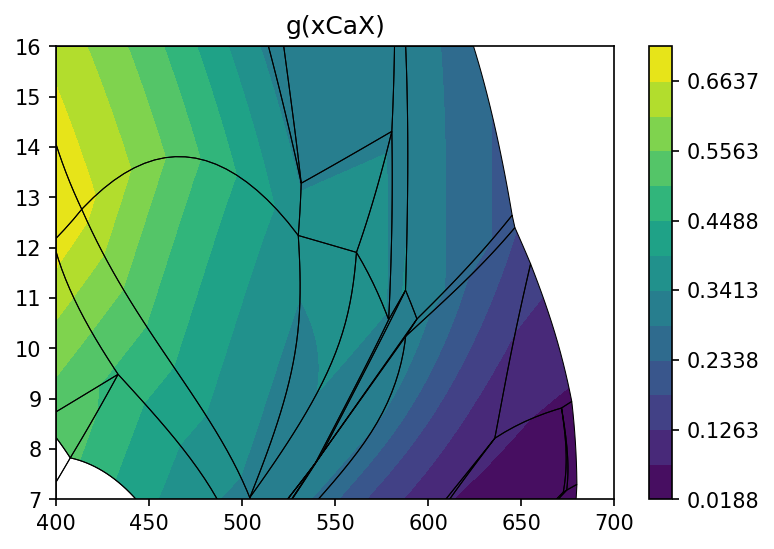

In [16]:
pt.isopleths('g', 'xCaX', N=14)

In [17]:
pt.isopleths('chl')

Missing expression argument. Available variables for phase chl are:
mode x y f m QAl Q1 Q4 xMgM1 xMnM1 xFeM1 xAlM1 xMgM23 xMnM23 xFeM23 xMgM4 xFeM4 xFe3M4 xAlM4 xSiT2 xAlT2 H2O SiO2 Al2O3 CaO MgO FeO K2O Na2O TiO2 MnO O factor G H S V rho


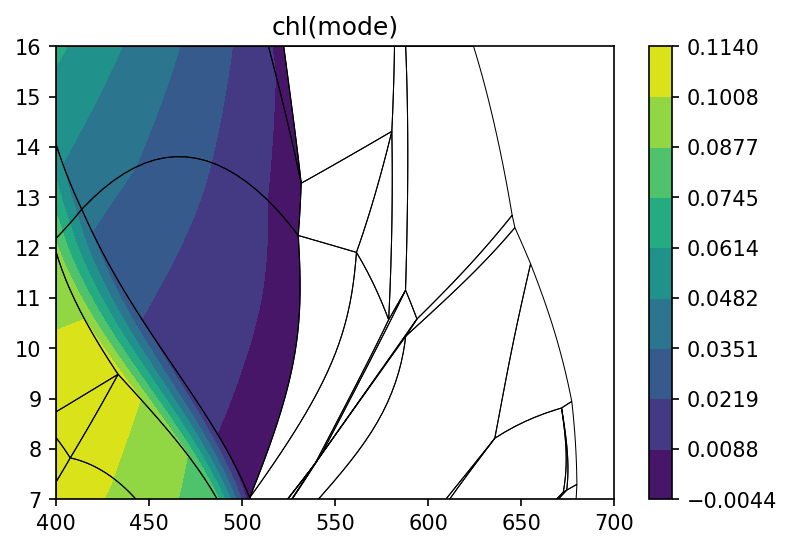

In [18]:
pt.isopleths('chl', 'mode')

## Calculations along PT paths
### NEED FIX
`psexplorer` allows you to evaluate equilibria along user-defined PT path. PT path is defined by series of points (path is interpolated) and method `collect_ptpath` do actual calculations. It runs THERMOCALC with ptguesses obtained from existing calculations.

In [ ]:
t = [409, 432, 468, 503, 525, 547, 575, 593, 617, 621, 616, 591, 553, 526]
p = [10.25, 10.84, 11.72, 12.49, 12.89, 12.87, 12.44, 12.01, 11.02, 9.96,  9.13,  8.49,  7.88,  7.61]
pa = pt.collect_ptpath(t, p)

You can see phase modes along PT path using `show_path_modes` method.

In [ ]:
pt.show_path_modes(pa, exclude=['H2O'])

or show value of user-defined expression shown as colored strip on PT space.

In [ ]:
pt.show_path_data(pa, 'g', 'mode')

## Something

`show_status` method shows status of calcualtions on the grid. Possible failed calculations are shown.

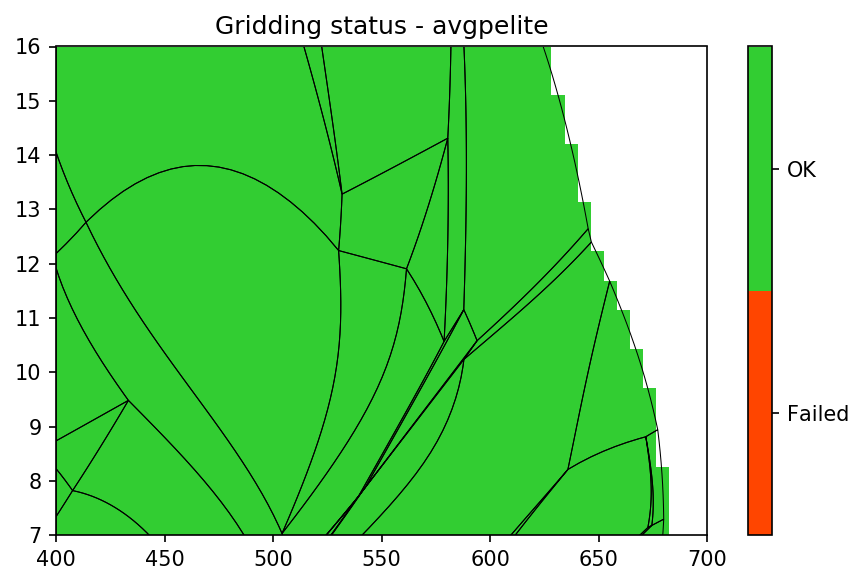

In [19]:
pt.show_status()

Do you want to know execution time of THERMOCALC on individual grid points? Check `show_delta` method.

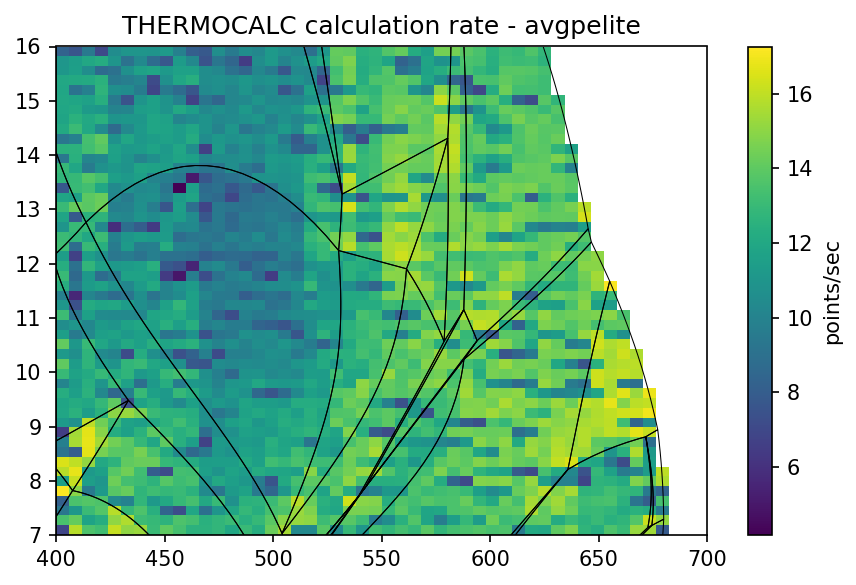

In [20]:
pt.show_delta(pointsec=True)